reference https://3dbabove.com/2017/11/14/optimizationalgorithms/

## Stochastic Gradient Descent (SGD)

In [1]:
import numpy as np

In [2]:
# J = cos(3*pi*theta) / theta
def minimaFunction(theta):
    # theta != 0
    return np.cos(3*np.pi * theta) / theta

def minimaFunctionDerivative(theta):
    const1 = 3*np.pi
    const2 = const1 * theta
    return -const1 * np.sin(const2)/theta - np.cos(const2)/(theta ** 2)

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

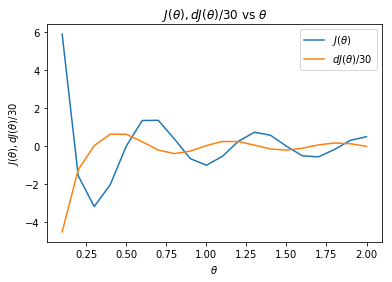

In [4]:
theta = np.arange(.1, 2.1, 0.1)
Jtheta = minimaFunction(theta)
dJtheta = minimaFunctionDerivative(theta)

plt.plot(theta, Jtheta, label= r'$J(\theta)$')
plt.plot(theta, dJtheta/30, label=r'$dJ(\theta)/30$')
plt.legend()
axes = plt.gca()

plt.ylabel(r'$J(\theta), dJ(\theta)/30$')
plt.xlabel(r'$\theta$')
plt.title(r'$J(\theta), dJ(\theta)/30 $ vs $\theta$')
plt.show()

- This cost function has a few minima: around .25, 1.0, and 1.7
- The derivative is equal to 0 at the minima and large at the inflection points

### Implement SGD

In [5]:
import matplotlib.animation as animation

In [6]:
def optimize(iterations, oF, dOF, params, learning_ratel):
    """
    Arguments:
        iterations: number of iterations required to run
        oF: the objective function
        dOF: the derivative function of the objective function
        params: the parameters of the function to minimize
    return:
        oParams: list of optimized paramters at each step of iteration
    """
    
    oParams = [params]
    for i in range(iterations):
        # Compute the derivative of the parameters
        dParams = dOF(params)
        params = params - learning_rate * dParams
        
        oParams.append(params)
        
    return np.array(oParams)

In [7]:
theta = .6
iterations = 45
learning_rate = 0.0007
optimizedParameters = optimize(iterations, minimaFunction, minimaFunctionDerivative, theta, learning_rate)

In [12]:
print(optimizedParameters.shape)

(46,)


### Animation of SGD

In [13]:
from matplotlib import animation, rc
from IPython.display import HTML

In [14]:
# need download ffmpeg to enable animation. Set the proper path of ffmpeg
plt.rcParams['animation.ffmpeg_path'] = 'E:\\tools\\ffmpeg-3.4.1-win64-static\\bin\\ffmpeg.exe'

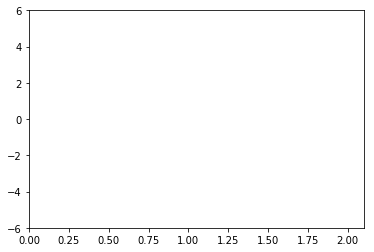

In [15]:
# https://matplotlib.org/devdocs/api/_as_gen/matplotlib.axes.Axes.plot.html#matplotlib.axes.Axes.plot

fig, ax = plt.subplots()

ax.set_xlim((0, 2.1))
ax.set_ylim((-6, 6))

line, =ax.plot([], [], lw=2)
optimizedPoints, = ax.plot([], [], 'bo')

In [16]:
def initForSingleParamSGD():
    theta = np.arange(.1, 2.1, 0.1)
    Jtheta = minimaFunction(theta)
    line.set_data(theta, Jtheta)
    return (line, )

In [19]:
optimizedJValues = minimaFunction(optimizedParameters)
print(optimizedJValues.shape)

(46,)


In [26]:
# animation function. this is called sequentially
def animateForSingleParamSGD(i):
    optimizedPoints.set_data(optimizedParameters[:i], optimizedJValues[:i])
    fig.suptitle('Iteration (%d), theta=%f,J(theta)=%f' % (i, optimizedParameters[i], optimizedJValues[i]))
    return (optimizedPoints, )

In [27]:
# blit=True means only re-draw the parts that have changed
anim = animation.FuncAnimation(fig, animateForSingleParamSGD, init_func = initForSingleParamSGD, 
                              frames = iterations, interval = 120, blit=True)

In [30]:
HTML(anim.to_html5_video())

### SGD with large learning rate

In [44]:
theta = .6
iterations = 45
learning_rate = 0.01 # set the learning rate to 0.015, it will find the second minima point
optimizedParameters = optimize(iterations, minimaFunction, minimaFunctionDerivative, theta, learning_rate)
optimizedJValues = minimaFunction(optimizedParameters)

In [47]:
# blit=True means only re-draw the parts that have changed
anim_largeLearningRate = animation.FuncAnimation(fig, animateForSingleParamSGD, init_func = initForSingleParamSGD, 
                              frames = iterations, interval = 360, blit=True)

In [48]:
HTML(anim_largeLearningRate.to_html5_video())

### SGD with multi variate parameters

In [49]:
import matplotlib.mlab as mlab
import scipy.stats

In [50]:
def minimaFunctionBiNormal(params):
    # Bivariate Normal function
    # https://matplotlib.org/api/mlab_api.html#matplotlib.mlab.bivariate_normal
    # http://mathworld.wolfram.com/BivariateNormalDistribution.html
    X, Y = params
    sigma11, sigma12, mu11, mu12 = (3.0, .5, 0.0, 0.0)
    Z1 = mlab.bivariate_normal(X, Y, sigma11, sigma12, mu11, mu12)
    
    return -40 * Z1

In [51]:
def minimaFunctionBiNormalDerivative(params):
    X, Y = params
    sigma11, sigma12, mu11, mu12 = (3.0, .5, 0.0, 0.0)
    
    dZ1X = -scipy.stats.norm.pdf(X, mu11, sigma11)*(mu11 - X)/sigma11**2
    dZ1Y = -scipy.stats.norm.pdf(Y, mu12, sigma12)*(mu12 - Y)/sigma12**2
 
    return (dZ1X,dZ1Y)

In [52]:
def optimizeSGDForBiNormal(iterations, oF, dOF, params, learning_rate):
    """  
    return:
        oParams: the list of optimized parameters at each step
    """
    
    oParams = [params]
    
    for i in range(iterations):
        dParams = dOF(params)
        
        #SGD
        params = tuple([param - learning_rate * dParam for param, dParam in zip(params, dParams)])
        
        oParams.append(params)
        
    return oParams

#### sample plot of contour

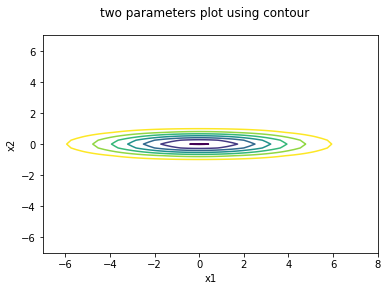

In [67]:
fig, ax = plt.subplots()

ax.set_xlim((-7, 8))
ax.set_ylim((-7, 7))

ax.set_xlabel('x1')
ax.set_ylabel('x2')
fig.suptitle('two parameters plot using contour')
optimizedPoints, = ax.plot([], [], 'bo')

delta = 0.25
x = np.arange(-6.0, 7.0, delta)

X, Y = np.meshgrid(x, x)
Z = minimaFunctionBiNormal([X, Y])

ax.contour(X, Y, Z)

plt.show()

#### Animation with 2 paramters

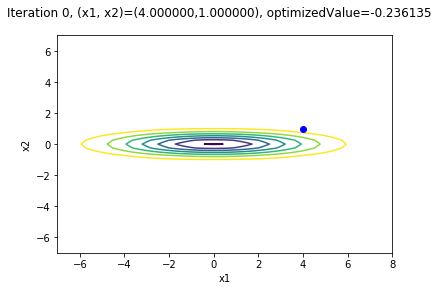

In [100]:
fig, ax = plt.subplots()

ax.set_xlim((-7, 8))
ax.set_ylim((-7, 7))

ax.set_xlabel('x1')
ax.set_ylabel('x2')

optimizedPoints, = ax.plot([], [], 'bo')

delta = 0.25
x = np.arange(-6.0, 7.0, delta)

X, Y = np.meshgrid(x, x)
Z = minimaFunctionBiNormal([X, Y])

iterations = 100
# learning rate = 1.0: two lines, the change in x2 direction is very slow, while change in x1 direction jumps
# learning rate = 0.5: the learning for x1 direction is very slow
learning_rate = 0.5
x, y = 4.0, 1.0
params = (x, y)
optimizedParameters = optimizeSGDForBiNormal(iterations, 
                                             minimaFunctionBiNormal, 
                                             minimaFunctionBiNormalDerivative,
                                             params,
                                             learning_rate)
ax.contour(X, Y, Z)

def AnimationForTwoParamsSGD(i):
    optimizedP = optimizedParameters[:i+1]
    optimizedPoints.set_data([x1 for x1, _ in optimizedP], [x2 for _, x2 in optimizedP])
    optimizedJValue = minimaFunctionBiNormal(optimizedParameters[i])
    x1, x2 = optimizedParameters[i]
    fig.suptitle('Iteration %d, (x1, x2)=(%f,%f), optimizedValue=%f' % (i, x1, x2, optimizedJValue))
    return (optimizedPoints,)

# blit=True means only re-draw the parts that have changed
anim_SGD = animation.FuncAnimation(fig, AnimationForTwoParamsSGD, 
                                   frames = iterations, interval = 100, blit=True)

In [101]:
HTML(anim_SGD.to_html5_video())

### SGD with Momentum

In [102]:
def optimizeSGDWithMomentumForBiNormal(iterations, oF, dOF, params, learning_rate, beta):
    """
    with Momentum
    return:
        oParams: the list of optimized parameters at each step
    """
    
    oParams = [params]
    vdw = (0.0, 0.0)
    for i in range(iterations):
        dParams = dOF(params)
        
        # compute the momentum of each gradient vdw = vdw * beta + (1-beta) * dParam
        vdw = tuple([vDW*beta + (1.0 - beta) * dParam for vDW, dParam in zip(vdw, dParams)])
        
        # SGD with momentum: param = param - learning_rate * momentum
        params = tuple([param - learning_rate * vDW for param, vDW in zip(params, vdw)])
        
        oParams.append(params)
        
    return oParams

best paramters:  (0.04055946581765757, -0.0023157786407481786)


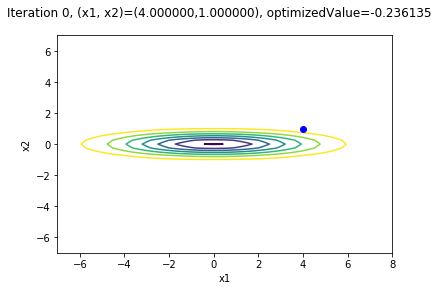

In [113]:
fig, ax = plt.subplots()

ax.set_xlim((-7, 8))
ax.set_ylim((-7, 7))

ax.set_xlabel('x1')
ax.set_ylabel('x2')

optimizedPoints, = ax.plot([], [], 'bo')

delta = 0.25
x = np.arange(-6.0, 7.0, delta)

X, Y = np.meshgrid(x, x)
Z = minimaFunctionBiNormal([X, Y])

iterations = 100
# try large learning rate, it's better than without momentum
# learning rate = 2.0: we could get the result faster
learning_rate = 2.5

beta = 0.9

x, y = 4.0, 1.0
params = (x, y)
optimizedParameters = optimizeSGDWithMomentumForBiNormal(iterations, 
                                                         minimaFunctionBiNormal, 
                                                         minimaFunctionBiNormalDerivative,
                                                         params,
                                                         learning_rate,
                                                         beta)
ax.contour(X, Y, Z)
print("best paramters: ", optimizedParameters[-1])

def AnimationForTwoParamsSGDWithMomentum(i):
    optimizedP = optimizedParameters[:i+1]
    optimizedPoints.set_data([x1 for x1, _ in optimizedP], [x2 for _, x2 in optimizedP])
    optimizedJValue = minimaFunctionBiNormal(optimizedParameters[i])
    x1, x2 = optimizedParameters[i]
    fig.suptitle('Iteration %d, (x1, x2)=(%f,%f), optimizedValue=%f' % (i, x1, x2, optimizedJValue))
    return (optimizedPoints,)

# blit=True means only re-draw the parts that have changed
anim_SGDWithMomentum = animation.FuncAnimation(fig, AnimationForTwoParamsSGDWithMomentum, 
                                   frames = iterations, interval = 100, blit=True)

In [114]:
HTML(anim_SGDWithMomentum.to_html5_video())